<a href="https://colab.research.google.com/github/GGGoradia/Machine-learning-lab/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#q1 a
df=pd.read_csv("Machine.csv")
var=list(df.columns)
print(var)

['Operating_hours', 'Output']


# New Section

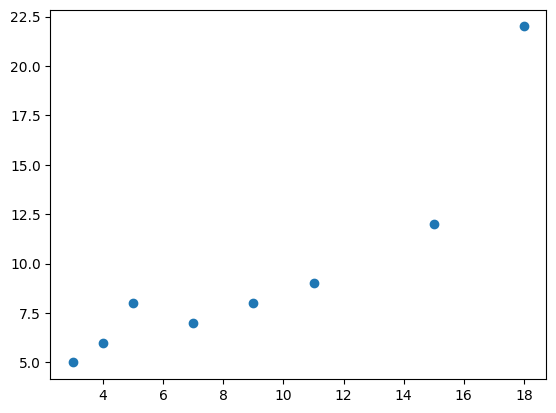

In [6]:
#q1 b
plt.scatter(df[var[0]],df[var[1]])
plt.show()

In [17]:
#q1 c
def gradient(X,y,learningrate=0.01,epochs=2):
    X=np.c_[np.ones((X.shape[0],1)),X]
    m,n=X.shape
    theta=np.zeros(n)
    for epoch in range(epochs):
        predictions=X.dot(theta)#matrix multiplication X and theta
        error=predictions-y
        gradient=1/m*X.T.dot(error)#1/m multiplied by matrix multiplication of X transpose and theta
        theta=theta-learningrate*gradient
        mse=(1/m)*np.sum(error**2)#meansquared error
        print(f"epoch{epoch+1}/{epochs},MSE: {mse}")
    return theta
X=df['Operating_hours']
y=df['Output']
theta=gradient(X,y)
print("regression parameters",theta)
inputhours=np.array([1,13]).reshape(1,-1)
predicted=inputhours.dot(theta)
print('predicted output ',predicted)
def modelerror(X,y,theta):
  X=np.c_[np.ones((X.shape[0],1)),X]#adds 1 to each row as the first element
  predictions=X.dot(theta)
  mse=(1/len(y))*np.sum((predictions-y)**2)#meansquared error after the prediction has been made
  return mse
error=modelerror(X,y,theta)
print("model error",error)

epoch1/2,MSE: 118.375
epoch2/2,MSE: 6.274273828124999
regression parameters [0.0931     1.01672812]
predicted output  [13.31056562]
model error 5.72050677576416


In [8]:
#q1 d
theta=gradient(X,y,epochs=5)
print(theta)

epoch1/5,MSE: 118.375
epoch2/5,MSE: 6.274273828124999
epoch3/5,MSE: 5.72050677576416
epoch4/5,MSE: 5.715526784712311
epoch5/5,MSE: 5.713257287255299
[0.10357301 1.02090657]


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
#q2
X=df.iloc[:,:-1].values.flatten()#selects value of X as a numpy array
y=df.iloc[:,-1].values#selects value of y as a numpy array
X=X.reshape(-1,1)#reshapes X to a 2D array for all values
model=LinearRegression()#create model
model.fit(X,y)#fit the data
intercept=model.intercept_
coef=model.coef_
print("intercept:",intercept)
print("coefficients:",coef[0])
pred=model.predict([[13]])
print("predicted value with sklearn: ",pred[0])
mse=mean_squared_error(y,model.predict(X))
print("mean squared error: ",mse)

print("comparision")
print("custom parameters: ",theta)
print("sklearn parameters: ",intercept,coef[0])
print("custom predicted: ",predicted[0])
print("sklearn predicted: ",pred[0])
print("custom mse: ",error)
print("sklearn mse: ",mse)



intercept: 1.5160891089108919
coefficients: 0.9009900990099009
predicted value with sklearn:  13.228960396039604
mean squared error:  5.2368502475247505
comparision
custom parameters:  [0.0931     1.01672812]
sklearn parameters:  1.5160891089108919 0.9009900990099009
custom predicted:  13.310565624999999
sklearn predicted:  13.228960396039604
custom mse:  5.72050677576416
sklearn mse:  5.2368502475247505


In [21]:
#q3 a
data=pd.read_csv("housePrice_small.csv")
print("Features :",list(data.columns))

Features : ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice']


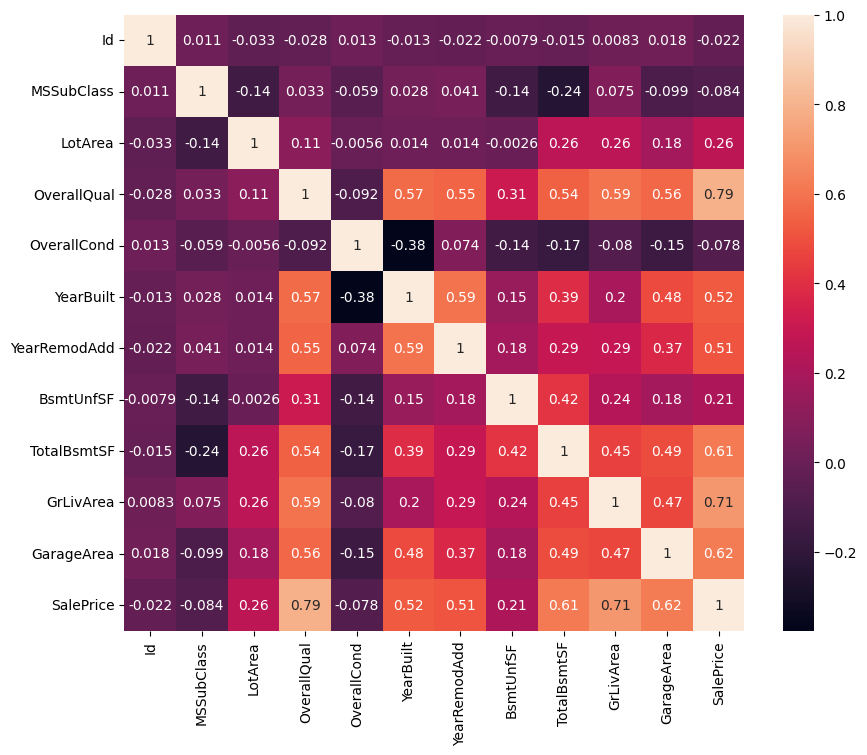

In [25]:
#q3 b
import seaborn as sns#for heat map
target='SalesPrice'
predictor=[col for col in data.columns if col!=target]#select all columns except target
correlationmat=data.corr()# correlation coefs between each variables
plt.figure(figsize=(10,8))
sns.heatmap(correlationmat,annot=True)
plt.show()
